In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.cosmology import Planck18 as cosmo
from astropy.coordinates import SkyCoord, Distance
from astropy.io import fits
import astropy.constants as c
from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS

from astropy.visualization import make_lupton_rgb, MinMaxInterval, SqrtStretch, ImageNormalize, ZScaleInterval, LogStretch, simple_norm


import tarfile
import os
import sys
import shutil

In [2]:
#Aspecto de las figuras
%matplotlib inline
%config InlineBackend.figure_format = 'png'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.labeltop'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": ["CMU Serif"],'font.size': 18, 'axes.linewidth': 3})
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'CMU Serif'
plt.rcParams['mathtext.it'] = 'CMU Serif:italic'
plt.rcParams['mathtext.bf'] = 'CMU Serif:bold'

plt.rc('legend',fontsize='small') # fuente de leyenda

In [3]:
def plot_fotom(name, norm_percent, norm_power, anchura=False, center=False):
    #carga de datos  
    hdu = fits.open(name)[0] #carga imágen de referencia
    dat = hdu.data #la convierte en matriz de datos
    wcs = WCS(hdu); #carga coordenadas

    if anchura != False and center!=False: #si quiero solo ver parte de la imagen
        x,y = center[0], center[1]
        plot_data = dat[int(y)-anchura[0]:int(y)+anchura[0],int(x)-anchura[1]:int(x)+anchura[1]]
    else: #si la quiero ver entera
        plot_data = dat
    
    #plot
    norm = simple_norm(dat, percent=norm_percent ,stretch = 'power', power=norm_power) #estiro la imagen
    fig,ax = plt.subplots(figsize=[14,14]) #creo los ejes
    ax = plt.subplot(projection=wcs) #introduzco coordenadas

    ax.imshow(plot_data, origin='lower', norm=norm, cmap='afmhot') #dibujo los datos
    ax.grid(color='white', ls='dashed', alpha = 0.3) #rejilla
    ax.set_xlabel('Right Ascension (J2000)') #etiquetas de ejes
    ax.set_ylabel('Declinaction (J2000)')

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


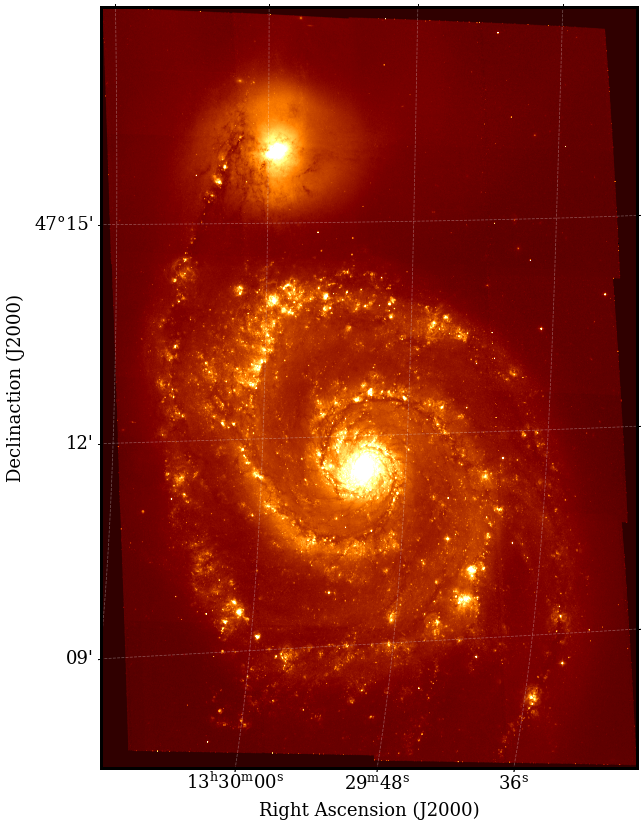

In [4]:
name = '/Users/mrbach/Desktop/Master/extra/galaxias/CURSO GALAXIAS/2-hst/hlsp_heritage_hst_acs-wfc_m51_f658n_v1_drz.fits'
norm_percent = 100-5e-1
norm_power = 0.5

plot_fotom(name=name, norm_percent=norm_percent, norm_power=norm_power, anchura=False, center=False)

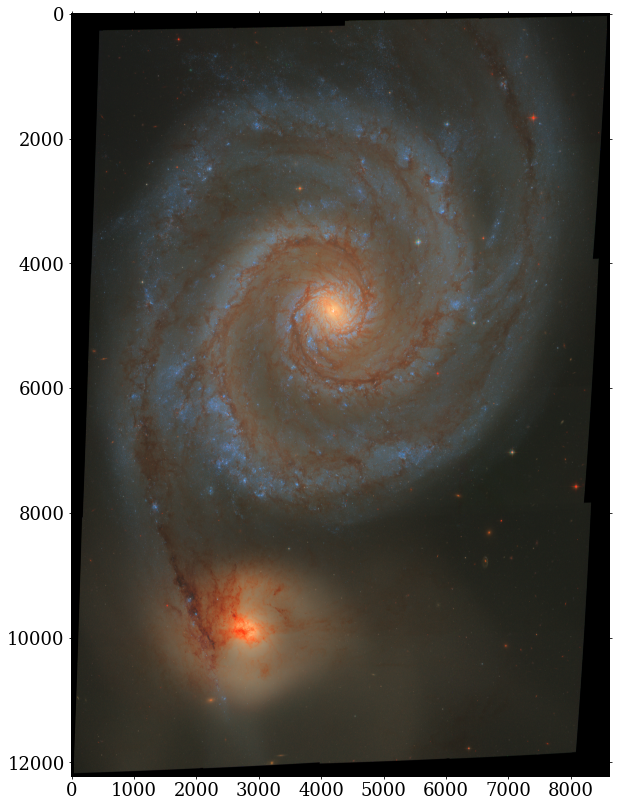

In [5]:
r = fits.open('/Users/mrbach/Desktop/Master/extra/galaxias/CURSO GALAXIAS/2-hst/hlsp_heritage_hst_acs-wfc_m51_f814w_v1_drz.fits')
g = fits.open('/Users/mrbach/Desktop/Master/extra/galaxias/CURSO GALAXIAS/2-hst/hlsp_heritage_hst_acs-wfc_m51_f555w_v1_drz.fits')
b = fits.open('/Users/mrbach/Desktop/Master/extra/galaxias/CURSO GALAXIAS/2-hst/hlsp_heritage_hst_acs-wfc_m51_f435w_v1_drz.fits')
image = make_lupton_rgb(r[0].data/1.8, g[0].data/0.9, b[0].data/0.6, stretch=0.3)
fig,ax = plt.subplots(figsize=[14,14])
ax.imshow(image)